##  Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from plotly.offline import download_plotlyjs , init_notebook_mode , plot, iplot
init_notebook_mode(connected=True)

## Data

In [2]:
data = pd.read_csv('INR=X.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


## Data info

In [4]:
data.shape

(262, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [6]:
# check for null bvalues in the dataset
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


<AxesSubplot:>

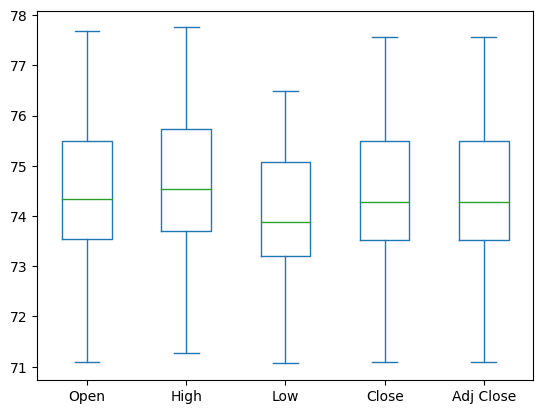

In [8]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
data['Date']=pd.to_datetime(data['Date'])

In [10]:
print(f'DataFrame contains stock prices between {data.Date.min()} {data.Date.max()}')
print(f'Total days = {(data.Date.max() - data.Date.min()).days}days')

DataFrame contains stock prices between 2020-01-27 00:00:00 2021-01-26 00:00:00
Total days = 365days


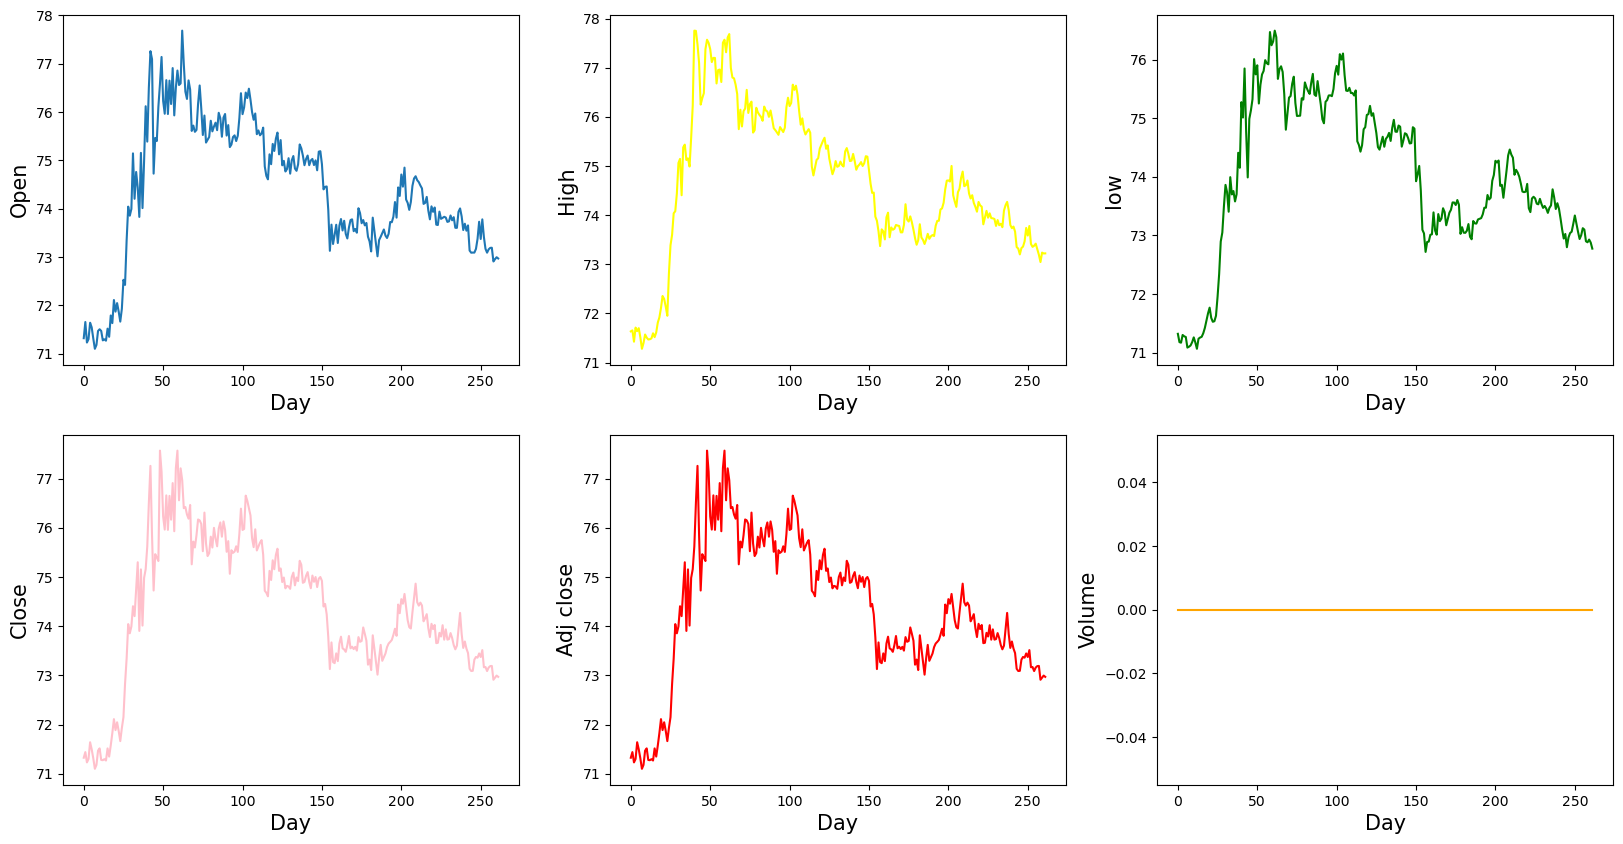

In [11]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(20,10))

ax1.plot(data['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

ax2.plot(data['High'], color='yellow')
ax2.set_xlabel("Day", fontsize= 15)
ax2.set_ylabel("High", fontsize=15)

ax3.plot(data['Low'], color='green')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("low", fontsize=15)


ax4.plot(data['Close'], color='pink')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

ax5.plot(data['Adj Close'], color='red')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj close", fontsize=15)


ax6.plot(data['Volume'], color='orange')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

plt.show()

In [12]:
Layout = go.Layout(
    title = 'Stock Prices ',
    xaxis=dict(
    title='Date',
    titlefont=dict(
    family='Courier New, monospace',size=18,color='#7f7f7f'))
)
stock_data = [{'x':data['Date'], 'y':data['Close']}]
plot = go.Figure(data=stock_data,layout=Layout)

In [13]:
iplot(plot)

# # Data preprocessing

In [14]:
data.drop(['Date'], axis = 1, inplace= True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [16]:
std= StandardScaler()
data = std.fit_transform(data)

In [17]:
new_data = pd.DataFrame(data)
new_data.head()

,0,1,2,3,4,5
0,-2.158109,-2.008550,-2.056080,-2.130978,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,-1.909695,0.0


In [18]:
new_data.columns=['Open','High','Low','Close','Adj Close','Volume']
new_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,-2.158109,-2.008550,-2.056080,-2.130978,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,-1.909695,0.0


In [19]:
y = new_data["Close"]
x = new_data.drop(["Close"], axis=1)
x.head()

,Open,High,Low,Adj Close,Volume
0,-2.158109,-2.008550,-2.056080,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,0.0


## Split the Data into train and test

In [20]:

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state= 0)

In [21]:
scaler = StandardScaler().fit(x_train)

In [22]:
#creating a linear model
lm=  LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
trace0= go.Scatter(
 x= x_train.T[0],
y= y_train, 
mode ='markers',
name ='Actual' )
trace1 = go.Scatter(
x=x_train.T[0],
    y=lm.predict(x_train).T,
    mode = 'lines',
    name = 'Predicted'
)
stock_data= [trace0,trace1]
Layout.xaxis.title.text='Day'
plot2=go.Figure(data=stock_data,layout=Layout)


In [24]:
iplot(plot2)

In [25]:
scores= f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test,lm.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  1.0	1.0
MSE       2.0972883772157637e-31	1.943470534197193e-31

